# Convolutional Neural Network

### Importing the libraries

In [1]:
# libraries for dataset

import tensorflow as tf
from keras.datasets import mnist
import numpy as np

In [3]:
# libraries for model

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam

In [4]:
# libraries for graphing

import matplotlib.pyplot as plt
import pandas as pd

## Part 1 - Data Preprocessing

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

### Preprocessing the Training set

In [8]:
# Reshaping to 28x28x1
X_train = X_train.reshape(-1, 28, 28, 1)

In [9]:
X_train = X_train / 255

In [10]:
X_train = keras.utils.normalize(X_train, axis = 1)

In [11]:
# convert to one-hot code
y_train = to_categorical(y_train)

In [12]:
X_train.shape

(60000, 28, 28, 1)

### Preprocessing the Test set

In [40]:
# Reshaping to 28x28x1
X_test = X_test.reshape(-1, 28, 28, 1)

In [14]:
X_test = X_test / 255

In [15]:
X_test = keras.utils.normalize(X_test, axis = 1)

In [16]:
# convert to one-hot code
y_test = to_categorical(y_test)

In [17]:
X_test.shape

(10000, 28, 28, 1)

### Printing training image with label 

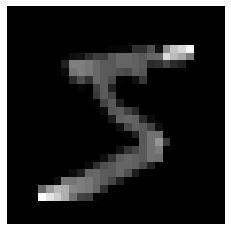

In [34]:
# visualizing image

img = X_train[0]
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

In [35]:
# label

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Part 2 - Building the CNN

### Initialising the CNN

In [20]:
cnn = tf.keras.models.Sequential()

In [21]:
cnn.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

In [22]:
cnn.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

In [23]:
cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnn.add(Dropout(0.5))

In [24]:
cnn.add(Flatten())

In [25]:
cnn.add(Dense(128, activation = "relu"))
cnn.add(Dropout(0.5))

In [26]:
cnn.add(Dense(10, activation = "softmax"))

In [42]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

## Part 3 - Training the CNN

### Compiling the CNN

In [27]:
cnn.compile(optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss = "categorical_crossentropy", metrics=["accuracy"])

### Training the CNN on the Training set and evaluating it on the Test set

In [28]:
history = cnn.fit(x=X_train, y=y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 181s 96ms/step - loss: 0.2397 - accuracy: 0.9270 - val_loss: 0.0620 - val_accuracy: 0.9812
Epoch 2/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.1016 - accuracy: 0.9700 - val_loss: 0.0461 - val_accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0786 - accuracy: 0.9766 - val_loss: 0.0396 - val_accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0667 - accuracy: 0.9797 - val_loss: 0.0383 - val_accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0576 - accuracy: 0.9822 - val_loss: 0.0337 - val_accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0517 - accuracy: 0.9832 - val_loss: 0.0322 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 188s 100ms/step - loss: 0.0478 - accuracy: 0.9857 - val_loss: 

## Part 4 - Model evaluation

In [29]:
cnn_history = pd.DataFrame(history.history)

In [30]:
cnn_history

,loss,accuracy,val_loss,val_accuracy
0,0.239725,0.926983,0.062002,0.9812
1,0.101641,0.969983,0.046141,0.9865
2,0.078553,0.976567,0.039618,0.9877
3,0.066740,0.979717,0.038280,0.9887
4,0.057589,0.982183,0.033691,0.9896
5,0.051749,0.983167,0.032195,0.9911
6,0.047836,0.985733,0.028089,0.9917
7,0.042794,0.986417,0.030888,0.9918
8,0.040794,0.987517,0.029580,0.9917
9,0.040733,0.987200,0.026021,0.9920


<AxesSubplot:>

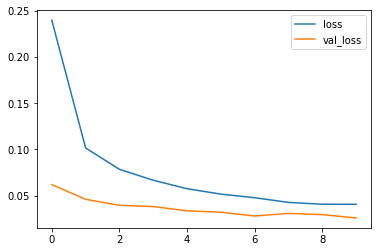

In [31]:
cnn_history[['loss','val_loss']].plot()

### A loss and validation loss curve are created, and the results are looking good. From the loss curve we can see that immediately as the model is run the loss is high, however it gradually decreases by the end of the last epoch, since the model is better trained. Loss for validation is constant, but slightly decreasing as seen from the graph.

<AxesSubplot:>

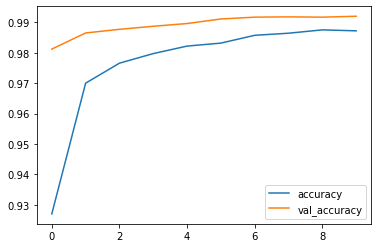

In [43]:
cnn_history[['accuracy','val_accuracy']].plot()

### An accuracy and validation accuracy curve are created, and the results are looking good. The model even passed with a 99.2% accuracy, which is very high. From the accuracy curve we can see that immediately as the model is run the accuracy is low, however it gradually increases by the end of the last epoch, since the model is better trained. Accuracy for validation is constant, but slightly increasing as seen from the graph.

## Part 5 - Making a single prediction

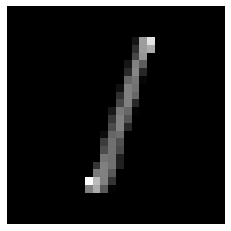

In [37]:
img = X_test[2]
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

In [38]:
y_test[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
predict_x= cnn.predict(img.reshape(-1,28,28,1))
predict_x= (predict_x > .5).astype(int)
print(predict_x)

1/1 [==============================] - 0s 27ms/step
[[0 1 0 0 0 0 0 0 0 0]]
